In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
#importing data
uber = pd.read_csv(r'.\Uber Request Data.csv')
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


# Data Inspection Part

In [3]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 210.8+ KB


* It is seen that time column are of object data type.
* Let's covert them to correct data type

In [4]:
#coverting object to date time datatype
uber['Request timestamp']=pd.to_datetime(uber['Request timestamp'])
uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'])

In [5]:
#checking data again
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 263.5+ KB


In [6]:
#getting size of data
uber.shape

(6745, 6)

In [7]:
#checking description of data
uber.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [8]:
#checking counts of data
uber['Pickup point'].value_counts()
uber['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

# Data Cleaning Part

In [9]:
#checking null values row-wise
uber.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
6740    2
6741    2
6742    2
6743    2
6744    2
Length: 6745, dtype: int64

In [10]:
#generating percentage of null values row-wise
round(uber.isnull().sum(axis=1)/len(uber)*100,3)

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
6740    0.03
6741    0.03
6742    0.03
6743    0.03
6744    0.03
Length: 6745, dtype: float64

* There is very small percent of missing values. So,there is no need to remove them.

In [11]:
#checking null values column-wise
uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [12]:
#generating percentage of null values column-wise
round(uber.isnull().sum()/len(uber)*100)

Request id            0.0
Pickup point          0.0
Driver id            39.0
Status                0.0
Request timestamp     0.0
Drop timestamp       58.0
dtype: float64

* It is observed that 39% and 58% are missing values in driver id and drop timestamp colmns respectively.
* Let's drop driver id because it is not useful for analysis

In [13]:
#dropping driver id column
uber = uber.drop('Driver id',axis=1)
uber.head(10)

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00


* Drop timestamp column contain drop time but it contains null values. It will happen if and only if when trip is not accepted by driver or no availability of cab.
* Let's check status with their respective null values.

In [14]:
uber[(uber['Drop timestamp'].isnull())].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

**Note:** This is the main reason of null values in drop time column. There are 1264 record of cancelled by driver and 2650 record of no cars available at that time.
* This is the important part of our analysis. So, we require these values.

* Let's check if there is any duplicate values in our data

In [15]:
#checking for duplicates
uber.duplicated().sum()

0

# Univariate Analysis

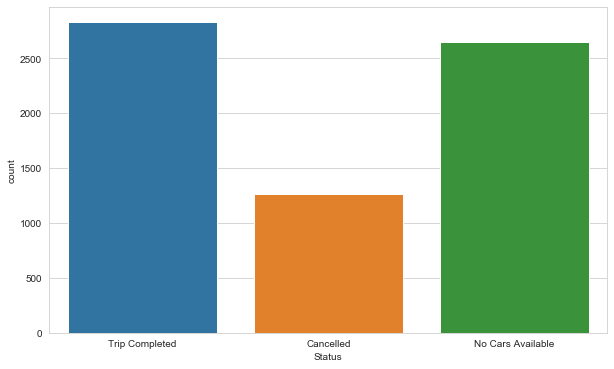

In [16]:
#plot to count the record of status
plt.figure(figsize=(10,6))
sns.countplot(uber['Status'])

* It is observed that no cars available is more than cancelled trips.

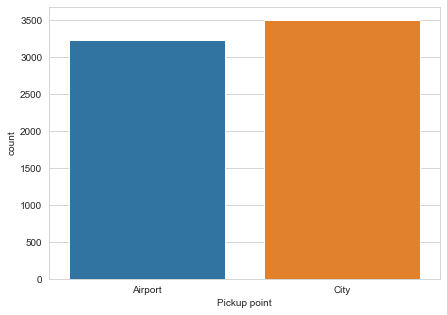

In [17]:
#plot to count record of pickup point
plt.figure(figsize=(7,5))
sns.countplot(uber['Pickup point'])

* Count of pickup point in city is slightly higher than airport.

# Bivariate Analysis

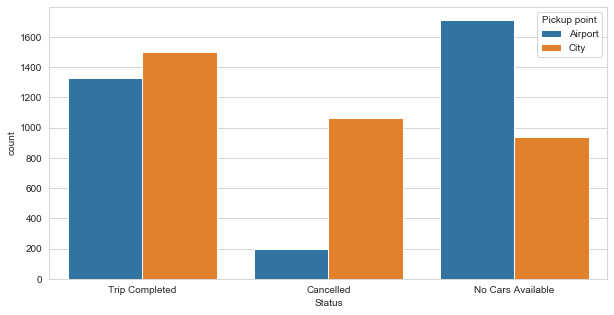

In [18]:
#plot status with pickup point
plt.figure(figsize=(10,5))
sns.countplot(x='Status',hue='Pickup point',data=uber)

* No cars available is higher from airport to city.
* Most of the cancellation took place from city to airport
* Most of the trips were completed from city to airport.

# Derived Matrices

In [19]:
#extracting hour from request time
uber['Request Hour'] = uber['Request timestamp'].dt.hour
uber[['Request timestamp','Request Hour']].head(10)

,Request timestamp,Request Hour
0,2016-11-07 11:51:00,11
1,2016-11-07 17:57:00,17
2,2016-12-07 09:17:00,9
3,2016-12-07 21:08:00,21
4,2016-07-13 08:33:16,8
5,2016-07-13 21:57:28,21
6,2016-07-14 06:15:32,6
7,2016-07-15 05:11:52,5
8,2016-07-15 17:57:27,17
9,2016-11-07 06:46:00,6


In [20]:
#creating request time slots
uber['Request Time Slot'] = 'Late Night'
uber.loc[uber['Request Hour'].between(4,8),'Request Time Slot'] = 'Early Morning'
uber.loc[uber['Request Hour'].between(8,12),'Request Time Slot'] = 'Late Morning'
uber.loc[uber['Request Hour'].between(12,16),'Request Time Slot'] = 'Noon'
uber.loc[uber['Request Hour'].between(16,20),'Request Time Slot'] = 'Evening'
uber.loc[uber['Request Hour'].between(20,24),'Request Time Slot'] = 'Night'
uber.head(10)

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request Hour,Request Time Slot
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Late Morning
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Late Morning
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Late Morning
5,3879,Airport,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,Night
6,4270,Airport,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,Early Morning
7,5510,Airport,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,Early Morning
8,6248,City,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,Evening
9,267,City,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,6,Early Morning


Let's create new column demand with value 1 because demand includes trip completed, cancelled and no cars available

In [21]:
#new column demand with value 1 for all status
uber['Demand']=1
uber.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request Hour,Request Time Slot,Demand
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Late Morning,1
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,1
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Late Morning,1
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night,1
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Late Morning,1


Let's create new column supply with value 0 for cancelled and no cars availbale and 1 for trips completed

In [22]:
#new column supply with value 1 and 0
uber['Supply']=0
uber.loc[uber['Status']=='Trip Completed','Supply']=1
uber.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request Hour,Request Time Slot,Demand,Supply
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Late Morning,1,1
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,1,1
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Late Morning,1,1
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night,1,1
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Late Morning,1,1


Let's create column gap which contains difference of supply and demand columns

In [23]:
#new column gap
uber['Gap']=uber['Demand']-uber['Supply']
uber.loc[uber['Gap']==0,'Gap']='Trip Completed'
uber.loc[uber['Gap']==1,'Gap']='Trip Not Completed'

In [24]:
uber.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request Hour,Request Time Slot,Demand,Supply,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Late Morning,1,1,Trip Completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,1,1,Trip Completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Late Morning,1,1,Trip Completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night,1,1,Trip Completed
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Late Morning,1,1,Trip Completed


Let's remove unnecessary columns which were created to get some important outputs

In [25]:
#dropping unnecessary columns
uber=uber.drop(['Request Hour', 'Supply', 'Demand'],axis=1)
uber.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request Time Slot,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Late Morning,Trip Completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Evening,Trip Completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Late Morning,Trip Completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Night,Trip Completed
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Late Morning,Trip Completed


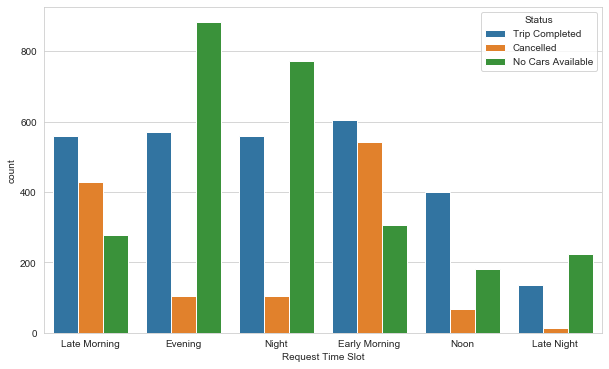

In [26]:
#Let's plot status with time slot
plt.figure(figsize=(10,6))
sns.countplot(x=uber['Request Time Slot'],hue=uber['Status'])

* Most of the cars were not available in evening and night time.
* Most of the cancellation took place in early morning and late morning.
* There is less cancellation in late night.

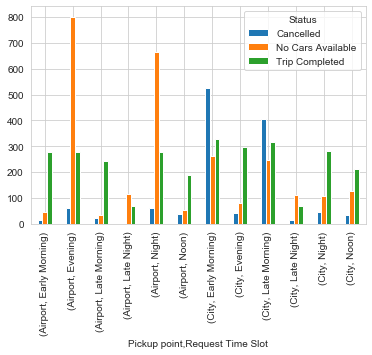

In [27]:
#plot to count status according to both pickup point and request time slot
pick_time = uber.groupby(['Pickup point','Request Time Slot', 'Status'])['Request id'].count().unstack()
pick_time.plot.bar()

* Most no cars available are in evening and night from airport to city.
* Most trips cancelled are in early and late morning from city to airport.

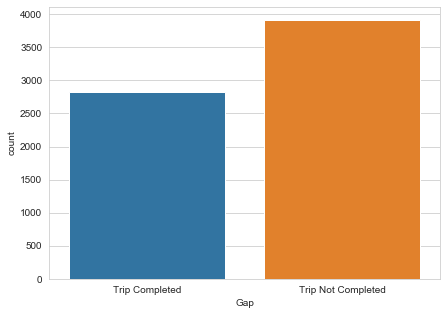

In [28]:
#plot gap to count completion of trips
plt.figure(figsize=(7,5))
sns.countplot(uber['Gap'])

* Number of trip not completed is higher than trip completed.

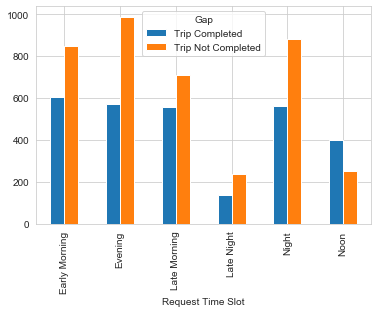

In [29]:
#plot gap with respect to request time slot
gap_time = pd.DataFrame(uber.groupby(['Request Time Slot','Gap'])['Request id'].count().unstack())
gap_time.plot.bar()

* Most of the trips were not completed in evening time.
* Less trips were completed during late night.
* In every case number of trips not complete is higher than trips completed except noon time.

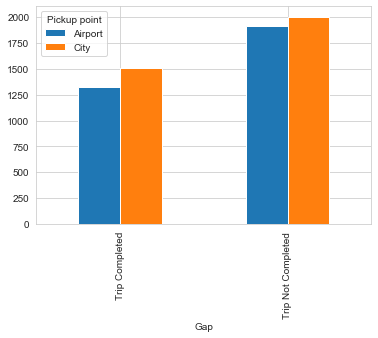

In [30]:
#plot gap with respect to pickup point
pick_gap = pd.DataFrame(uber.groupby(['Gap','Pickup point'])['Request id'].count().unstack())
pick_gap.plot.bar()

* Most of the trips were not completed from city to airport.

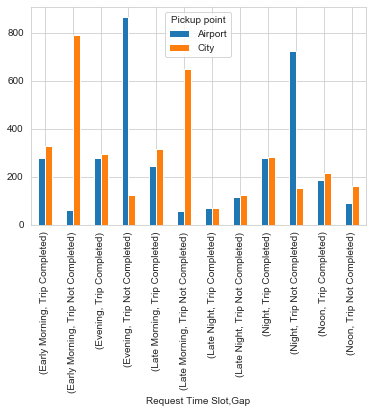

In [31]:
#plot pickup point with respect to request time slot and gap
gap_pickup_time = pd.DataFrame(uber.groupby(['Request Time Slot','Gap','Pickup point'])['Request id'].count().unstack())
gap_pickup_time.plot.bar()

* Most of the trips were not completed from airport to city in evening time.
* In early morning, more trips were not completed from city to airport.

### Hypothesis :

**Pickup Point - City :-** 
>As per the analysis, the morning time slot is most problematic where the requests are being cancelled. Most probably the requests are being cancelled by the drivers due to the morning rush as it being the office hours and seeing the destination as airport which would be too far, the driver would think to earn more for the shorter trips within the city.

**Pickup Point - Airport :-**
>Upon analysis, the evening time slot seems to be most problematic for pickup points as airport where the requests being No Cars Available. The reason seems to be that not enough cars are available to service the requests as cars might not be available at the airport due to the cars serving inside the city.

### Conclusions:

* Based on the data analysis performed, following recommendation can be used by Uber to bridge the gap between supply and demand:-
> * For bridging the demand supply gap from airport to city, making a permanent stand in the airport itself where the cabs will be available at all times and the incomplete requests can come down significantly.
> * Uber can provide some incentives to the driver who complete the trip from city to airport in the morning part. This might result the driver to not cancel the request from city to airport trips.
> * Last but sure solution to bring down the gap is to increase the numbers of cab in its fleet.